<a href="https://colab.research.google.com/github/AliAramideh/Image_denoising/blob/main/Image_Denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

---

In The Name Of God
<center>

# Author: **Ali Aramideh**

## Image Denoising using Autoencoder and PCA

1. Download the MNIST dataset and create a dataloader that adds gaussian noise to the input images.
2. Design and train an AutoEncoder on the MNIST dataset to denoise the noisy images.
3. Visualize original images, their corresponding noisy images and their reconstructed versions side by side.
4. Repeat the previous steps using PCA algorithm.

# Import Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.utils.data import DataLoader,random_split

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Load Dataset and Prepare It

### Download the MNIST dataset and create a dataloader that adds Gaussian noise to the input images.

To download the MNIST dataset, we can use the `torchvision` library in Python.

In [ ]:
# Download MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, download=True)


100%|██████████| 9912422/9912422 [00:00<00:00, 79667560.09it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 64986960.21it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 19938624.62it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 6303947.31it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Next, we need to create a dataloader that adds Gaussian noise to the input images. We can use the `torchvision.transforms` module to apply transformations to the dataset.

### Create dataloaders

In [ ]:
# Define the transformation to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL image to tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize the image
])

# Apply the transformation to the dataset
train_dataset.transform = transform
test_dataset.transform = transform

# Create dataloaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

In the above, we first define a transformation pipeline using `transforms.Compose`.
We convert the PIL image to a tensor, normalize the image.

Finally, we apply the transformation to the train and test datasets and create dataloaders for training and testing.

In [ ]:
# Add Gaussian noise to the images
def add_noise(image, mean=0.0, std=0.1):
    noise = torch.randn_like(image) * std + mean
    noisy_image = image + noise
    return noisy_image

# Define Your Model
torch neural network model

Design and train an AutoEncoder on the MNIST dataset to denoise the noisy images.

To design and train an AutoEncoder, we can use the PyTorch library.

In [ ]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True),
            nn.Linear(64, 12),
            nn.ReLU(True),
            nn.Linear(12, 6))

        self.decoder = nn.Sequential(
            nn.Linear(6, 12),
            nn.ReLU(True),
            nn.Linear(12, 64),
            nn.ReLU(True),
            nn.Linear(64, 128),
            nn.ReLU(True),
            nn.Linear(128, 28 * 28),
            nn.Tanh())

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Fit The Model
Also Define optimizer, Criterion and other parameters

In [ ]:
# To specify the device type responsible to load a tensor into memory
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the AutoEncoder model
model = AutoEncoder().to(device)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the AutoEncoder model
num_epochs = 60
n_total_steps = len(train_loader)

# loop over the dataset multiple times
for epoch in range(num_epochs):
    running_loss = 0.0
    for data in train_loader:
        images, _ = data

        # Flatten the images
        images = images.view(images.size(0), -1)

        # Add Gaussian noise to the images
        noisy_images = add_noise(images)
        noisy_images = noisy_images.to(device)
        images = images.to(device)

        ## Forward pass ##
        outputs = model(noisy_images)

        # Compute loss and perform backpropagation
        loss = criterion(outputs, images)

        ## Backward pass ##
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f'epoch {epoch + 1} from epoch {num_epochs}, loss: {running_loss / n_total_steps}')

epoch 1 from epoch 60, loss: 0.22615561300694054
epoch 2 from epoch 60, loss: 0.158066525737614
epoch 3 from epoch 60, loss: 0.13279333685252712
epoch 4 from epoch 60, loss: 0.12257974862512241
epoch 5 from epoch 60, loss: 0.11568101910131573
epoch 6 from epoch 60, loss: 0.11096125151684035
epoch 7 from epoch 60, loss: 0.10789788114045983
epoch 8 from epoch 60, loss: 0.105643648415931
epoch 9 from epoch 60, loss: 0.1039761039636918
epoch 10 from epoch 60, loss: 0.1024920950486843
epoch 11 from epoch 60, loss: 0.10126453005015723
epoch 12 from epoch 60, loss: 0.10020707361002974
epoch 13 from epoch 60, loss: 0.09929103521046354
epoch 14 from epoch 60, loss: 0.09845120250892792
epoch 15 from epoch 60, loss: 0.0978464918381878
epoch 16 from epoch 60, loss: 0.09715034208222748
epoch 17 from epoch 60, loss: 0.09652353403791944
epoch 18 from epoch 60, loss: 0.09603553544134219
epoch 19 from epoch 60, loss: 0.0955083250904134
epoch 20 from epoch 60, loss: 0.09511184123660456
epoch 21 from epo

In the above, we define an AutoEncoder model with an encoder and decoder architecture. The encoder takes the noisy images as input and encodes them into a lower-dimensional representation. The decoder then reconstructs the denoised images from the encoded representation. We use the Mean Squared Error (MSE) loss function and the Adam optimizer for training the model.

We select 60 for number of epochs because its output is better tha other(70, 50, 20, 10)

# Plot The Results

Visualize original images, their corresponding noisy images, and their reconstructed versions side by side.

To visualize the original images, noisy images, and reconstructed versions side by side, we can use the `matplotlib` library in Python.

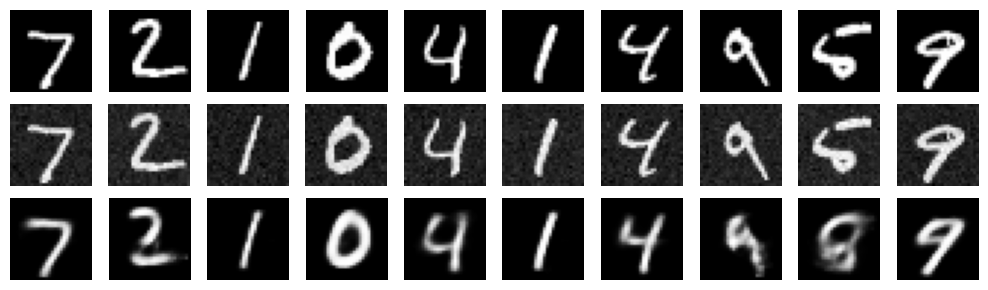

In [ ]:
# Get a batch of test images
data = next(iter(test_loader))
images, _ = data
images = images.view(images.size(0), -1)
noisy_images = add_noise(images)  # Add Gaussian noise

# Denoise the noisy images using the trained AutoEncoder
denoised_images = model(noisy_images)

# Reshape the images for visualization
images = images.view(-1, 28, 28)
noisy_images = noisy_images.view(-1, 28, 28)
denoised_images = denoised_images.view(-1, 28, 28)

# Plot the original images, noisy images, and denoised images
fig, axes = plt.subplots(nrows=3, ncols=10, figsize=(10, 3))
for i in range(10):
    axes[0, i].imshow(images[i], cmap= 'gray')
    axes[0, i].axis('off')
    axes[1, i].imshow(noisy_images[i], cmap= 'gray')
    axes[1, i].axis('off')
    axes[2, i].imshow(denoised_images[i].detach().numpy(), cmap='gray')
    axes[2, i].axis('off')
plt.tight_layout()
plt.show()

In the above code, we first get a batch of test images and add Gaussian noise to them. We then denoise the noisy images using the trained AutoEncoder. Finally, we reshape the images and plot the original images, noisy images, and denoised images side by side using `matplotlib`.

# PCA

To perform image denoising using the PCA algorithm, we can use the `sklearn` library in Python.

In [ ]:
def noisy(X):
    noise = np.random.RandomState(0).normal(scale= 0.25, size= X.shape)
    return X + noise

In [ ]:
rng = np.random.RandomState(0)
noise = rng.normal(scale=0.25, size=X_test.shape)
print(noise.shape)

print(noisy(X_test).shape)

(200, 256)
(200, 256)


In [ ]:
X, y = fetch_openml(data_id=41082, as_frame=False, return_X_y=True, parser="pandas")
X = MinMaxScaler().fit_transform(X)

X_train, X_test = train_test_split(X, random_state= 0, train_size= 1000, test_size= 200)

X_train_noisy = noisy(X_train)

X_test_noisy = noisy(X_test)


In [ ]:
# Find the best number of components for PCA
mse_min = 1000
num_components = 0

for i in range(1, min(X_train_noisy.shape)+1):
    pca = PCA(n_components= i)
    pca.fit(X_train_noisy)
    X_pca = pca.inverse_transform(pca.transform(X_test_noisy))
    mse = np.mean((X_test - X_pca) ** 2)
    if mse < mse_min:
        mse_min = mse
        num_components = i
print('Minimum MSE: ', mse_min)
print('The best number of components for PCA: ', num_components)

Minimum MSE:  0.01502569881183239
The best number of components for PCA:  23


In [ ]:
pca = PCA(n_components= num_components)
pca.fit(X_train_noisy)
X_pca = pca.inverse_transform(pca.transform(X_test_noisy))

In [ ]:
# plot 10 digits.
def plot_digits(X):
    fig, axs = plt.subplots(nrows=1, ncols=10, figsize=(8, 2))
    for img, ax in zip(X, axs.ravel()):
        ax.imshow(1-img.reshape((16, 16)), cmap="Greys")
        ax.axis("off")

Denoise MSE:  0.01502569881183239


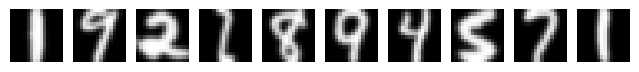

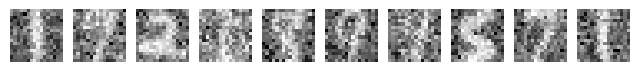

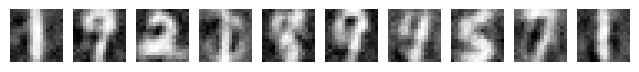

In [ ]:
plot_digits(X_test)
plot_digits(X_test_noisy)
plot_digits(X_pca)
print('Denoise MSE: ', mse_min)

We perform PCA on the images using the `PCA` class from `sklearn`. We then reconstruct the denoised images using the PCA components and reshape them for visualization. Finally, we plot the original images noisy images and denoised images using PCA side by side using `matplotlib`.
